In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

# Show 2 decimals
pd.set_option('display.float_format', lambda x: '%.0f' % x)
#pd.options.display.float_format = '{:,.2f}'.format

#Butun kolon ve satirlari gormek icin
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set plot background
sns.set_theme(style="whitegrid")

# Euro sign €
#print ("%s"%(u"\N{euro sign}"))

In [2]:
auto = pd.read_csv("/Users/macbook/Desktop/csv_dosyalari/autoscout_data_2000.csv")
df = auto.copy()
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,"HEERLEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"


In [3]:
# Drop Duplicated Columns and Url column
df.drop(['url', 'Mileage', 'Power', 'gearbox'], axis=1, inplace= True)

In [4]:
df.columns

Index(['location', 'make', 'model', 'short_description', 'price', 'mileage',
       'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'country_version', 'offer_number',
       'warranty', 'first_registration', 'production_date',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'previous_owner', 'last_timing_belt_change',
       'Gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight',
       'Fuel_type', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'emissions_sticker', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras',
       '\ncolour', '\nmanufacturer_color', '\npaint', ' upholstery_colour ',
       ' upholstery '],
      dtype='object')

In [5]:
# 1 - Rename and Reassign Columns (move unwanted characters from column names)
df.columns = ['location', 'make', 'model', 'short_description', 'price','mileage_km', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',  'first_registration',
       'production_date', 'general_inspection', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker','Comfort & Convenience', 'Entertainment & Media',
       'Safety & Security', 'extras', 'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

In [6]:
# 2 - Removing unwanted Chracters from data
# Except these colums ====> location, short_description, registration, first_registration, general_inspection, Comfort & Convenience, Entertainment & Media, Safety & Security, extras
clmns = ['make', 'model', 'price','mileage_km', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',
       'production_date', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker',
       'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

for column in clmns:
    df[column] = df[column].str.replace(r'\W', '')
    
df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,n4450n,191066km,08/2003,Gasoline,110kW150hp,nDealern,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,nNone,nNone,Automatic,1984cc,None,4,1280kg,Super95,None,nn,Euro4,None,"[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],4Grey,None,paintMetallic,upholsteryBlack,8Cloth
1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,n12950n,94758km,10/2013,Gasoline,92kW125hp,nDealern,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,nNone,nNone,Automatic,1395cc,None,4,1200kg,Gasoline,n49l100kmcombn,None,None,None,"[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]",4White,None,None,upholsteryBlack,8Cloth


In [7]:
# 3 - Delete NL from Location
df.location = df['location'].str.replace(', NL', '').str.upper()
df.location = df['location'].str.replace('.', '').str.replace('5', '').str.replace('6', '').str.replace(r'\+318429897', '')
df.location = df.location.replace('', np.NaN)

# Delete n from columns
L01 = ['seller', 'price', 'previous_owner', 'last_timing_belt_change', 'fuel_consumption', 'co2_emissions_g_km_comb']
for i in L01:
    df[i] = df[i].str.replace('n', '')

# Model nNonen to np.NaN
df.model = df.model.str.replace('nNonen', '').replace('', np.NaN)

# Delete [ ] from L02    
L02 = ['Comfort & Convenience', 'Entertainment & Media', 'Safety & Security', 'extras']
for i in L02:
    df[i] = df[i].str.replace('[', '')
    df[i] = df[i].str.replace(']', '')
    
# delete 4 from colour
df['colour'] = df['colour'].str.replace('4', '')

# Delete paint from paint column
df['paint'] = df['paint'].str.replace('paint', '')

# Delete upholstery from upholstery_colour
df['upholstery_colour'] = df['upholstery_colour'].str.replace('upholstery', '')

# Delete 8 from upholstery
df['upholstery'] = df['upholstery'].str.replace('8', '')

df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066km,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984cc,None,4,1280kg,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth
1,HEERLEN,Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758km,10/2013,Gasoline,92kW125hp,Dealer,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,Noe,Noe,Automatic,1395cc,None,4,1200kg,Gasoline,49l100kmcomb,Noe,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth


In [8]:
df['mileage_km'] = df['mileage_km'].str.replace('km', '')
df['warranty_months'] = df['warranty_months'].str.replace('months', '')
df['engine_size_cc'] = df['engine_size_cc'].str.replace('cc', '')
df['empty_weight_kg'] = df['empty_weight_kg'].str.replace('kg', '')
df['country_version'] = df['country_version'].str.replace('Countryversion', '')
df['co2_emissions_g_km_comb'] = df['co2_emissions_g_km_comb'].str.replace('gkmcomb', '')
df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth
1,HEERLEN,Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,10/2013,Gasoline,92kW125hp,Dealer,Compact,Used,Front,5,5,None,809725,None,10/2013,None,None,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,Noe,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth


In [9]:
df1 = df.copy()

In [10]:
L03 = ['price', 'mileage_km','engine_size_cc', 'empty_weight_kg', 'seats', 'doors', 'warranty_months', 'cylinders', 'co2_emissions_g_km_comb']
for i in L03:
    df[i] = df[i].replace(['None', 'Noe', 'Yes', 'Automatic', 'Manual', 'Semiautomatic'], np.NaN)
    df[i] = df[i].replace('', np.NaN)
    df[i] = df[i].astype(float)

df.describe()

,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb
count,69534,70951,65562,69790,24004,65265,64809,69500,52190
mean,24369,107148,5,5,8,1771,4,1433,129
std,468620,88475,1,1,9,702,1,321,68
min,1,1,1,1,1,0,1,1,0
25%,8945,30194,5,4,6,1390,4,1234,105
50%,17450,95615,5,5,6,1598,4,1382,133
75%,28935,163794,5,5,6,1995,4,1591,164
max,123456789,2215714,14,6,84,65535,12,4200,5900


In [11]:
# Find the rows which have no price
price_null_tf = (df['price'].isnull())
price_null = (df[price_null_tf])
price_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 54 to 71065
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 1570 non-null   object 
 1   make                     1570 non-null   object 
 2   model                    1570 non-null   object 
 3   short_description        1567 non-null   object 
 4   price                    0 non-null      float64
 5   mileage_km               1570 non-null   float64
 6   registration             1570 non-null   object 
 7   fuel_type                1570 non-null   object 
 8   power                    1570 non-null   object 
 9   seller                   1570 non-null   object 
 10  body_type                1570 non-null   object 
 11  type                     1570 non-null   object 
 12  drivetrain               1570 non-null   object 
 13  seats                    1471 non-null   float64
 14  doors                 

In [ ]:
df1 = df.copy()

In [12]:
L04 = ['power_kw', 'power_hp']
df[L04] = df.power.str.split('kW', expand= True)   
df['power_hp'] = df['power_hp'].str.replace('hp', '').replace('None', np.NaN) 
df['power_kw'] = df['power_kw'].str.replace('kg', '').replace('None', np.NaN)     
df[L04] = df[L04].astype(float)
df = df.drop(['power'], axis=1)
df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150
1,HEERLEN,Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,10/2013,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,10/2013,None,None,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125


In [13]:
df.describe()

,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp
count,69534,70951,65562,69790,24004,65265,64809,69500,52190,65045,65041
mean,24369,107148,5,5,8,1771,4,1433,129,116,157
std,468620,88475,1,1,9,702,1,321,68,59,75
min,1,1,1,1,1,0,1,1,0,1,1
25%,8945,30194,5,4,6,1390,4,1234,105,82,111
50%,17450,95615,5,5,6,1598,4,1382,133,103,140
75%,28935,163794,5,5,6,1995,4,1591,164,132,179
max,123456789,2215714,14,6,84,65535,12,4200,5900,3500,2173


In [14]:
L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df[i] = pd.to_datetime(df[i], format= '%m/%Y', errors= 'coerce')

df['production_date'] = pd.to_datetime(df['production_date'], format= '%Y', errors= 'coerce')
df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150
1,HEERLEN,Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125


In [15]:
df_dates = pd.DataFrame({'registration':  df.registration,
                         'first_registration' : df.first_registration,
                         'production_date' : df.production_date,
                         'general_inspection' : df.general_inspection,
                        'last_timing_belt_change' : df.last_timing_belt_change})

L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df_dates[i] = pd.to_datetime(df_dates[i], format= '%m/%Y', errors= 'coerce')

df_dates['production_date'] = pd.to_datetime(df_dates['production_date'], format= '%Y', errors= 'coerce')
df_dates['last_timing_belt_change'] = pd.to_datetime(df_dates['last_timing_belt_change'], format= '%m%Y', errors= 'coerce')
df_dates.head()

,registration,first_registration,production_date,general_inspection,last_timing_belt_change
0,2003-08-01,2003-08-01,NaT,2022-05-01,NaT
1,2013-10-01,2013-10-01,NaT,NaT,NaT
2,2013-05-01,2013-05-01,NaT,2022-03-01,NaT
3,2015-06-01,2015-06-01,2015-01-01,NaT,NaT
4,2015-10-01,2015-10-01,NaT,NaT,NaT


In [16]:
df_dates.describe()

,registration,first_registration,production_date,general_inspection,last_timing_belt_change
count,71056,71064,7416,36486,950
unique,300,300,25,96,84
top,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,2022-06-01 00:00:00,2021-06-01 00:00:00
freq,3270,3270,1148,2457,48
first,1976-03-01 00:00:00,1976-03-01 00:00:00,1997-01-01 00:00:00,2014-11-01 00:00:00,1900-01-01 00:00:00
last,2028-07-01 00:00:00,2028-07-01 00:00:00,2022-01-01 00:00:00,2026-11-01 00:00:00,2021-12-01 00:00:00


In [18]:
df2 = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71104 entries, 0 to 71103
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 71100 non-null  object        
 1   make                     71104 non-null  object        
 2   model                    71094 non-null  object        
 3   short_description        70935 non-null  object        
 4   price                    69534 non-null  float64       
 5   mileage_km               70951 non-null  float64       
 6   registration             71056 non-null  datetime64[ns]
 7   fuel_type                71104 non-null  object        
 8   seller                   71104 non-null  object        
 9   body_type                71104 non-null  object        
 10  type                     71104 non-null  object        
 11  drivetrain               71104 non-null  object        
 12  seats                    65562 n

In [19]:
# Add year Column
pd.options.display.float_format = '{:.0f}'.format

df.insert(3, 'year', df.registration.dt.year, True)

df.head(2)

,location,make,model,year,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,2003,2.0 FSI Ambition Pro Line,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150
1,HEERLEN,Audi,A3,2013,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125


In [20]:
# Year 2025 and 2028 to np.nan
df['year'] = df['year'].replace([2025, 2028], np.NaN)

In [21]:
df.year.value_counts().index.sort_values()

Float64Index([1976.0, 1980.0, 1981.0, 1991.0, 1993.0, 1994.0, 1995.0, 1996.0,
              1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
              2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0,
              2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0,
              2021.0, 2022.0],
             dtype='float64')

In [22]:
df.year.value_counts(bins=3)

(2006.667, 2022.0]      63262
(1991.333, 2006.667]     7788
(1975.953, 1991.333]        4
Name: year, dtype: int64

In [23]:
df.head(2)

,location,make,model,year,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,2003,2.0 FSI Ambition Pro Line,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150
1,HEERLEN,Audi,A3,2013,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125


In [24]:
pd.options.display.float_format = '{:,.0f}'.format
df.mileage_km.describe().T

count      70,951
mean      107,148
std        88,475
min             1
25%        30,194
50%        95,615
75%       163,794
max     2,215,714
Name: mileage_km, dtype: float64

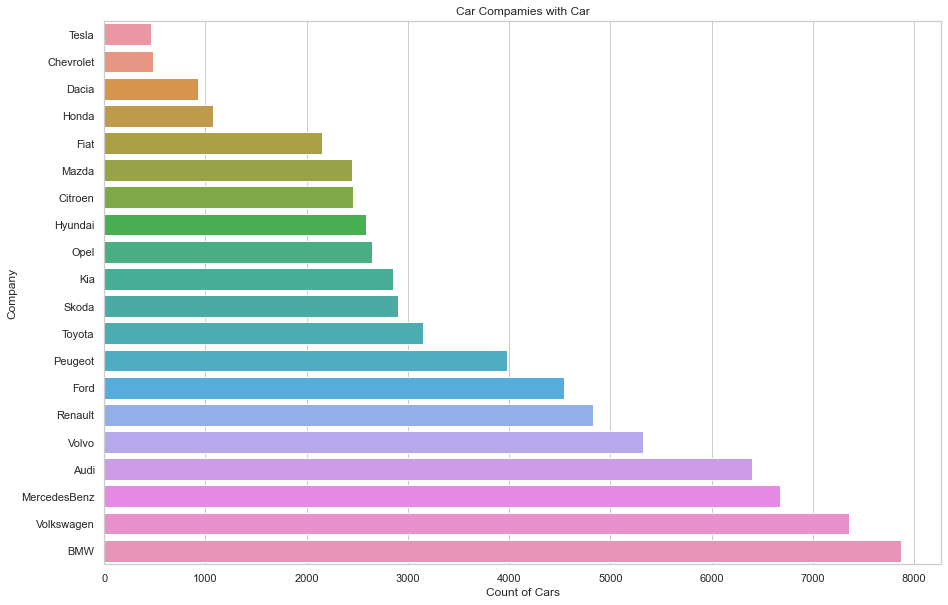

In [25]:
plt.figure(figsize = (15,10))
sns.countplot(y = df.make, order=df.make.value_counts(ascending=True).index)
plt.xlabel('Count of Cars')
plt.ylabel('Company')
plt.title('Car Compamies with Car')
plt.show()

In [26]:
df_dates.loc[0,'first_registration'].year

2003

In [27]:
# Save Csv df01
#df.to_csv('df01.csv')

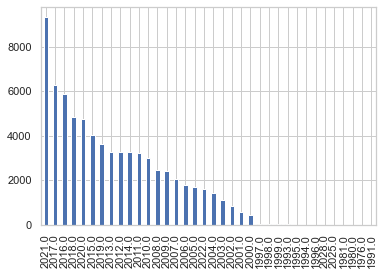

In [28]:
df.first_registration.dt.year.value_counts().plot(kind= 'bar');

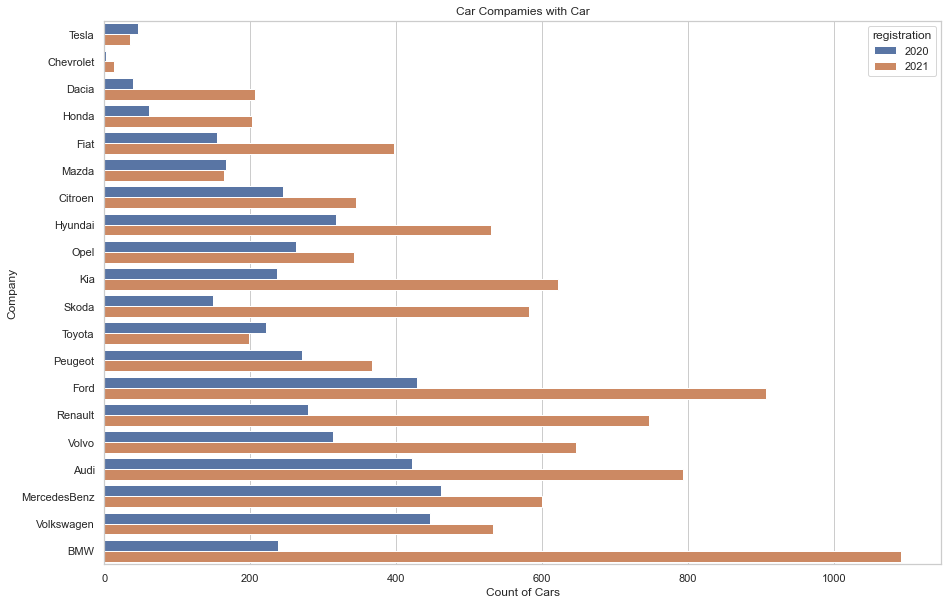

In [29]:
plt.figure(figsize = (15,10))
sns.countplot(y = df.make,
              order=df.make.value_counts(ascending=True).index,
             hue= df.registration.dt.year,
              hue_order= [2020, 2021]
             )
plt.xlabel('Count of Cars')
plt.ylabel('Company')
plt.title('Car Compamies with Car')
plt.show()

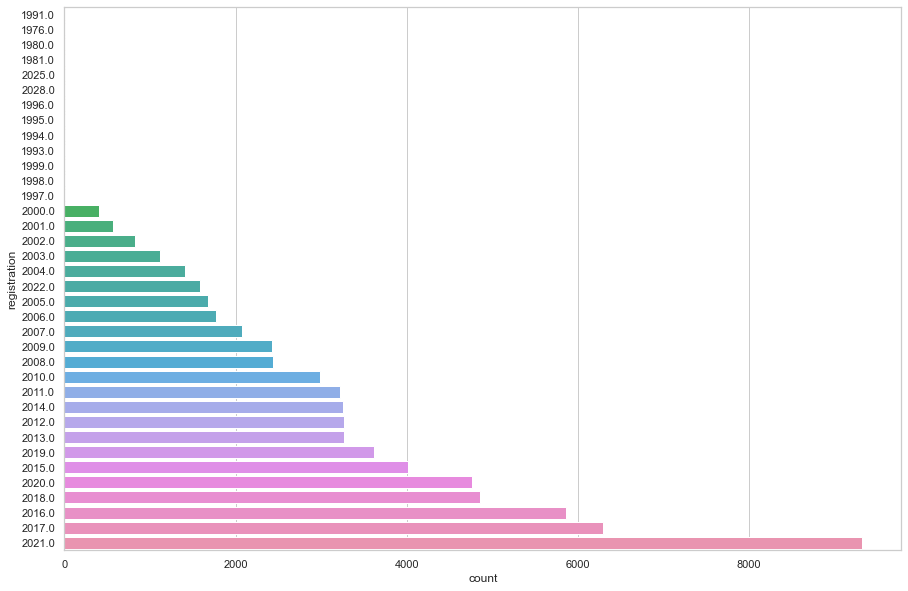

In [30]:
plt.figure(figsize = (15,10))
sns.countplot(y = df.registration.dt.year,
              order=df.registration.dt.year.value_counts(ascending= True).index
             
             )
plt.show()

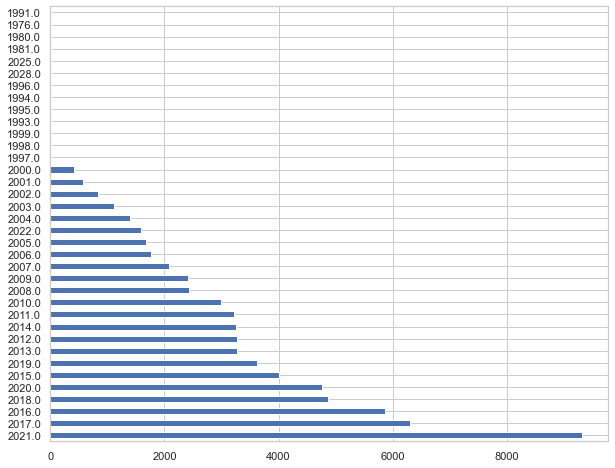

In [31]:
plt.figure(figsize=(10, 8))
df.registration.dt.year.value_counts().plot.barh();

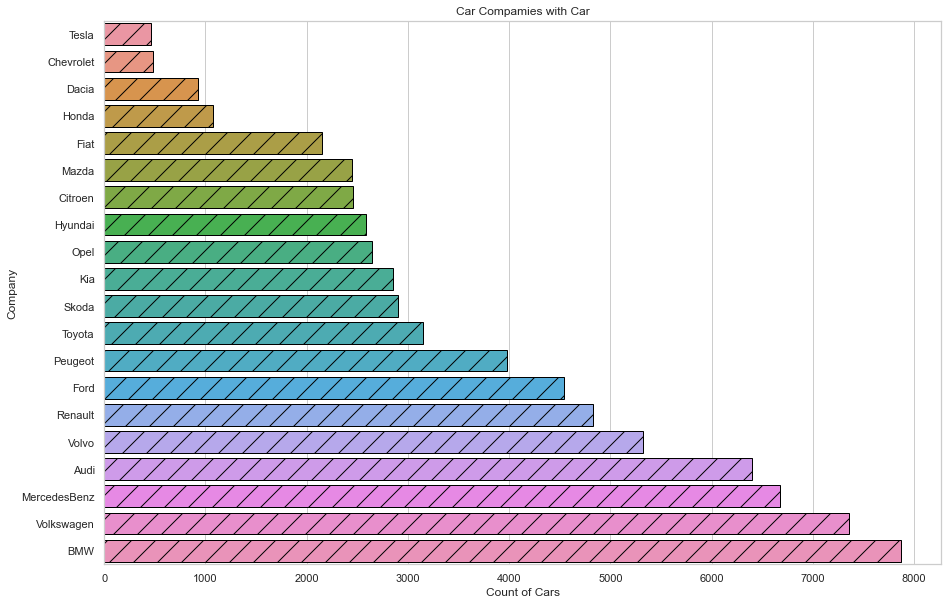

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(y = df.make, 
              order=df.make.value_counts(ascending=True).index,
             lw= 1, ec= 'black', hatch= '/')
plt.xlabel('Count of Cars')
plt.ylabel('Company')
plt.title('Car Compamies with Car')
plt.show()

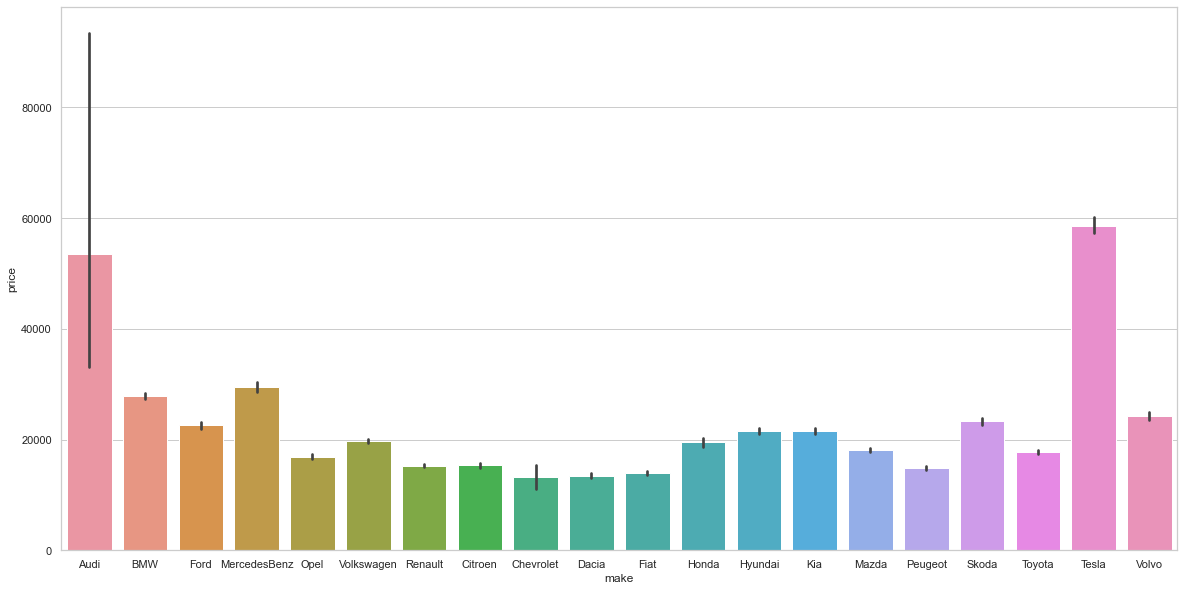

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x= df.make,
            y= df.price);

In [34]:
pd.set_option('display.max_rows', 30)
pd.options.display.float_format = '{:,.0f}'.format
df.groupby('make').price.describe()

,count,mean,std,min,25%,50%,75%,max
make,,,,,,,,
Audi,"6,247","53,488","1,561,861",590,"13,895","22,950","44,950","123,456,789"
BMW,"7,647","27,912","25,264",600,"10,750","19,950","35,840","279,950"
Chevrolet,471,"13,214","23,109",900,"3,295","4,650","9,440","199,700"
Citroen,"2,397","15,373","11,998",499,"5,450","12,445","21,750","69,444"
Dacia,908,"13,501","6,442","1,000","8,494","12,500","19,175","32,999"
Fiat,"2,081","13,973","9,625",1,"6,950","11,950","18,500","69,950"
Ford,"4,471","22,630","20,147",1,"6,750","17,777","30,445","229,950"
Honda,"1,052","19,510","12,748","1,249","8,276","17,900","28,950","62,200"
Hyundai,"2,520","21,574","14,743",450,"9,950","17,990","29,950","80,313"


In [35]:
pd.options.display.float_format = '{:.4f}'.format
df.corr()

,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp
year,1.0000,0.0216,-0.7626,0.0947,0.3273,0.2410,-0.2712,-0.3432,0.1668,-0.5486,0.0757,0.0758
price,0.0216,1.0000,-0.0223,0.0511,0.1075,0.2111,0.0098,0.0050,0.0237,-0.0066,0.0287,0.0305
mileage_km,-0.7626,-0.0223,1.0000,-0.0055,-0.1562,-0.2406,0.2455,0.2858,-0.0395,0.4159,-0.0510,-0.0520
seats,0.0947,0.0511,-0.0055,1.0000,0.4672,0.0128,-0.0771,-0.0710,0.0992,-0.0658,0.0188,0.0143
doors,0.3273,0.1075,-0.1562,0.4672,1.0000,0.0412,-0.1792,-0.1900,0.0983,-0.1822,-0.0841,-0.0895
warranty_months,0.2410,0.2111,-0.2406,0.0128,0.0412,1.0000,-0.0105,-0.0222,0.0995,-0.1214,0.0713,0.0752
engine_size_cc,-0.2712,0.0098,0.2455,-0.0771,-0.1792,-0.0105,1.0000,0.8190,0.5970,0.3407,0.6492,0.6956
cylinders,-0.3432,0.0050,0.2858,-0.0710,-0.1900,-0.0222,0.8190,1.0000,0.4506,0.3739,0.6238,0.6693
empty_weight_kg,0.1668,0.0237,-0.0395,0.0992,0.0983,0.0995,0.5970,0.4506,1.0000,0.0688,0.7110,0.7109
co2_emissions_g_km_comb,-0.5486,-0.0066,0.4159,-0.0658,-0.1822,-0.1214,0.3407,0.3739,0.0688,1.0000,0.1961,0.2110


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,71054.0000,2014.3785,5.4943,1976.0000,2011.0000,2016.0000,2019.0000,2022.0000
price,69534.0000,24369.2312,468620.1376,1.0000,8945.0000,17450.0000,28935.0000,123456789.0000
mileage_km,70951.0000,107148.0480,88474.7988,1.0000,30193.5000,95615.0000,163794.5000,2215714.0000
seats,65562.0000,4.8379,0.7770,1.0000,5.0000,5.0000,5.0000,14.0000
doors,69790.0000,4.5347,0.9143,1.0000,4.0000,5.0000,5.0000,6.0000
warranty_months,24004.0000,7.7804,8.7317,1.0000,6.0000,6.0000,6.0000,84.0000
engine_size_cc,65265.0000,1771.0424,701.9133,0.0000,1390.0000,1598.0000,1995.0000,65535.0000
cylinders,64809.0000,4.0760,0.9399,1.0000,4.0000,4.0000,4.0000,12.0000
empty_weight_kg,69500.0000,1433.3983,320.5942,1.0000,1234.0000,1382.0000,1591.0000,4200.0000
co2_emissions_g_km_comb,52190.0000,128.8250,67.7918,0.0000,105.0000,133.0000,164.0000,5900.0000


In [37]:
# KNN tontemi ile bosluklara deger atamak

#!pip install ycimpute
from ycimpute.imputer import knnimput

In [80]:
price_null_tf = (df.price == np.NaN)
df[df.price.isnull()].index[:28032]

Int64Index([   54,    91,   100,   105,   114,   120,   174,   365,   374,
              380,
            ...
            70635, 70653, 70654, 70673, 70785, 70805, 70857, 70900, 70987,
            71065],
           dtype='int64', length=1570)

In [55]:
list_make_german = ['Audi', 'BMW', 'MercedesBenz', 'Volkswagen']
df.loc[df['make'].isin(list_make_german)].make.value_counts()

BMW             7873
Volkswagen      7359
MercedesBenz    6676
Audi            6394
Name: make, dtype: int64

In [57]:
list_make_german = ['Audi', 'BMW', 'MercedesBenz', 'Volkswagen']
df_german = df[df['make'].isin(list_make_german)]

In [75]:
df_german.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28302 entries, 0 to 35487
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 28300 non-null  object        
 1   make                     28302 non-null  object        
 2   model                    28299 non-null  object        
 3   year                     28290 non-null  float64       
 4   short_description        28195 non-null  object        
 5   price                    27640 non-null  float64       
 6   mileage_km               28286 non-null  float64       
 7   registration             28292 non-null  datetime64[ns]
 8   fuel_type                28302 non-null  object        
 9   seller                   28302 non-null  object        
 10  body_type                28302 non-null  object        
 11  type                     28302 non-null  object        
 12  drivetrain               28302 n

In [58]:
df_num2 = df_german[:].select_dtypes(include = ['float64', 'int64'])
df_num2.head(2)

col_names = list(df_num2)
col_names

['year',
 'price',
 'mileage_km',
 'seats',
 'doors',
 'warranty_months',
 'engine_size_cc',
 'cylinders',
 'empty_weight_kg',
 'co2_emissions_g_km_comb',
 'power_kw',
 'power_hp']

In [59]:
n_df = np.array(df_num2)
n_df[:1]

array([[2.00300e+03, 4.45000e+03, 1.91066e+05, 5.00000e+00, 3.00000e+00,
        6.00000e+00, 1.98400e+03, 4.00000e+00, 1.28000e+03,         nan,
        1.10000e+02, 1.50000e+02]])

In [60]:
n_df.shape

(28302, 12)

In [61]:
# Assign values with KNN method
dff_german = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/28302 with 1 missing, elapsed time: 542.054
Imputing row 101/28302 with 1 missing, elapsed time: 550.355
Imputing row 201/28302 with 1 missing, elapsed time: 552.208
Imputing row 301/28302 with 1 missing, elapsed time: 553.509
Imputing row 401/28302 with 0 missing, elapsed time: 553.920
Imputing row 501/28302 with 2 missing, elapsed time: 554.273
Imputing row 601/28302 with 1 missing, elapsed time: 554.870
Imputing row 701/28302 with 1 missing, elapsed time: 555.077
Imputing row 801/28302 with 0 missing, elapsed time: 555.262
Imputing row 901/28302 with 1 missing, elapsed time: 555.471
Imputing row 1001/28302 with 0 missing, elapsed time: 555.709
Imputing row 1101/28302 with 1 missing, elapsed time: 555.941
Imputing row 1201/28302 with 1 missing, elapsed time: 556.144
Imputing row 1301/28302 with 1 missing, elapsed time: 556.339
Imputing row 1401/28302 with 2 missing, elapsed time: 557.281
Imputing row 1501/28302 with 2 missing, elapsed time: 557.495
Imputing row 1601/28

In [67]:
float0 = pd.options.display.float_format = '{:.0f}'.format
dff_german = pd.DataFrame(dff_german, columns=col_names)
dff_german.head()

,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp
0,2003,4450,191066,5,3,6,1984,4,1280,109,110,150
1,2013,12950,94758,5,5,5,1395,4,1200,116,92,125
2,2013,12445,160883,5,5,4,1395,4,1200,116,90,122
3,2015,12450,145102,5,5,6,1395,4,1533,38,92,125
4,2015,14945,119666,4,3,6,1395,4,1105,111,92,125


In [68]:
float4 = pd.options.display.float_format = '{:.4f}'.format
dff_german.corr()

,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp
year,1.0000,0.0143,-0.7415,0.1673,0.3351,0.4010,-0.2895,-0.3712,0.2450,-0.6750,0.1381,0.1434
price,0.0143,1.0000,-0.0194,0.0002,0.0059,0.0101,0.0041,-0.0002,0.0151,-0.0102,0.0272,0.0278
mileage_km,-0.7415,-0.0194,1.0000,-0.0375,-0.1367,-0.4176,0.2128,0.2656,-0.1582,0.5423,-0.1853,-0.1893
seats,0.1673,0.0002,-0.0375,1.0000,0.4973,0.0711,-0.1072,-0.1076,0.0894,-0.1375,-0.0277,-0.0244
doors,0.3351,0.0059,-0.1367,0.4973,1.0000,0.1008,-0.1850,-0.2155,0.1495,-0.2773,-0.0770,-0.0781
warranty_months,0.4010,0.0101,-0.4176,0.0711,0.1008,1.0000,-0.0985,-0.1356,0.1805,-0.2740,0.1571,0.1610
engine_size_cc,-0.2895,0.0041,0.2128,-0.1072,-0.1850,-0.0985,1.0000,0.7623,0.4052,0.4157,0.5759,0.5873
cylinders,-0.3712,-0.0002,0.2656,-0.1076,-0.2155,-0.1356,0.7623,1.0000,0.3046,0.5020,0.5516,0.5622
empty_weight_kg,0.2450,0.0151,-0.1582,0.0894,0.1495,0.1805,0.4052,0.3046,1.0000,-0.1213,0.6417,0.6523
co2_emissions_g_km_comb,-0.6750,-0.0102,0.5423,-0.1375,-0.2773,-0.2740,0.4157,0.5020,-0.1213,1.0000,0.0430,0.0432


In [69]:
dff_german.to_csv('dff_german.csv')

In [71]:
df[df.make.isin(list_make_german)].price.isnull().sum()

662

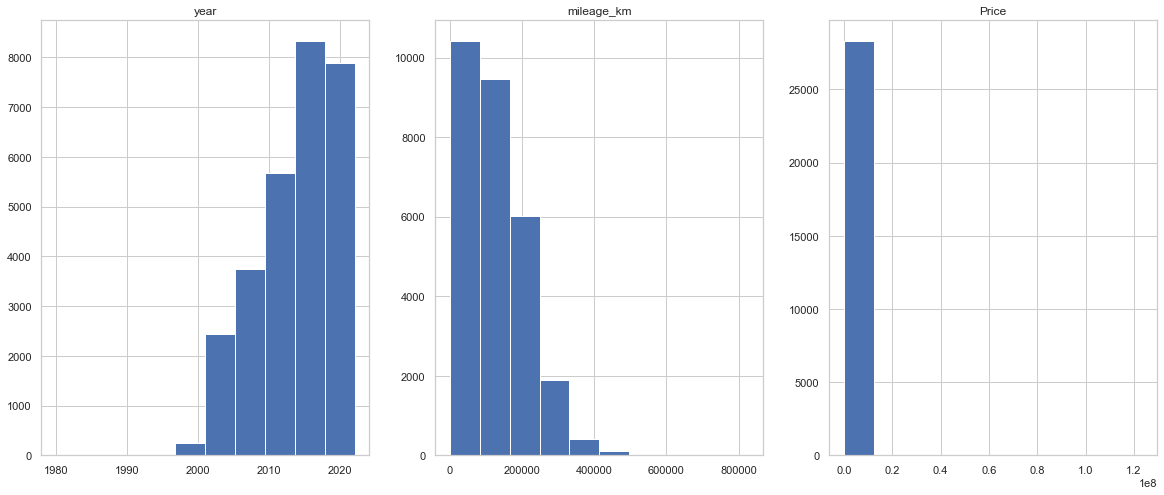

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))
 
ax1.hist(dff_german["year"])
ax1.set_title("year")
 
ax2.hist(dff_german["mileage_km"])
ax2.set_title("mileage_km")
 
ax3.hist(dff_german["price"])
ax3.set_title("Price")
 
plt.show()

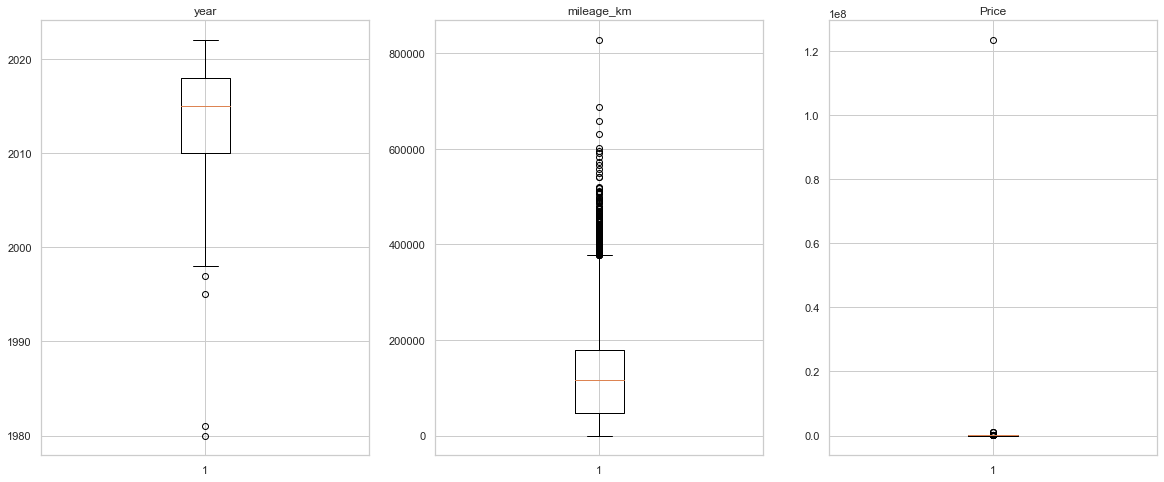

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))
 
ax1.boxplot(dff_german["year"])
ax1.set_title("year")
 
ax2.boxplot(dff_german["mileage_km"])
ax2.set_title("mileage_km")
 
ax3.boxplot(dff_german["price"])
ax3.set_title("Price")
 
plt.show()

In [125]:
df_german.loc[df_german['price'].isin([np.NaN])].indexdf_

Int64Index([   54,    91,   100,   105,   114,   120,   174,   365,   374,
              380,
            ...
            35092, 35128, 35193, 35250, 35272, 35325, 35369, 35390, 35471,
            35481],
           dtype='int64', length=662)

662

In [141]:
index_ = 54

value_make = df[df.index == index_].make.values[0]
value_model = df[df.index == index_].model.values[0]
value_year = df[df.index == index_].year.values[0]
value_mileage = df[df.index == index_].mileage_km.values[0]
print(value_make, '-', value_model, '-', value_year, '-', value_mileage)
print(dff_german.loc[index_, 'price'])

Audi - A1 - 2016.0 - 99230.0
16173.699817719904


In [142]:
pd.set_option('display.max_rows', 30)
L06 = ['make', 'model','year','price','mileage_km', 'seats', 'doors', 'warranty_months', 'engine_size_cc',
       'cylinders', 'empty_weight_kg', 'power_kw', 'power_hp', 'co2_emissions_g_km_comb']
df[(df.make == value_make) & (df.model == value_model) & (df.year == (value_year))].loc[:, L06]

,make,model,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,power_kw,power_hp,co2_emissions_g_km_comb
54,Audi,A1,2016,NaN,99230,4,3,NaN,1395,4,1090,93,126,113
55,Audi,A1,2016,15945,140650,4,5,NaN,1798,4,1180,141,192,129
84,Audi,A1,2016,14900,74086,4,5,6,999,3,1065,70,95,102
87,Audi,A1,2016,14950,129839,4,5,3,999,3,990,70,95,103
223,Audi,A1,2016,17490,93033,4,5,6,999,NaN,1065,70,95,NaN
375,Audi,A1,2016,16950,75520,4,5,6,999,3,1035,71,97,98
381,Audi,A1,2016,16400,67600,5,5,NaN,999,3,1060,70,95,97
394,Audi,A1,2016,15950,53865,4,5,NaN,999,3,NaN,70,95,NaN
431,Audi,A1,2016,14600,110139,4,5,3,999,3,1035,70,95,98
434,Audi,A1,2016,13900,188842,4,5,NaN,999,3,1035,71,97,98


In [150]:
dff_german.loc[18811]

year                        2012
price                       9500
mileage_km                100000
seats                          5
doors                          5
warranty_months                4
engine_size_cc              1796
cylinders                      4
empty_weight_kg             1405
co2_emissions_g_km_comb      113
power_kw                      80
power_hp                     109
Name: 18811, dtype: float64

In [149]:
df[df.make == 'MercedesBenz'].index

Int64Index([18811, 18812, 18813, 18814, 18815, 18816, 18817, 18818, 18819,
            18820,
            ...
            25477, 25478, 25479, 25480, 25481, 25482, 25483, 25484, 25485,
            25486],
           dtype='int64', length=6676)

In [151]:
df.loc[18811]

location                                                     BARNEVELD
make                                                      MercedesBenz
model                                                             A180
year                                                              2020
short_description    AUTOMAAT | PROGRESSIVE | M-BUX | LED | CAMERA ...
                                           ...                        
paint                                                         Metallic
upholstery_colour                                                Black
upholstery                                                 Fullleather
power_kw                                                           100
power_hp                                                           136
Name: 18811, Length: 47, dtype: object

In [169]:
df[df.price.isnull()].make.value_counts()

BMW             226
Volkswagen      165
Volvo           151
Audi            147
MercedesBenz    124
Renault          94
Peugeot          90
Ford             73
Fiat             67
Citroen          63
Toyota           63
Hyundai          62
Opel             58
Skoda            49
Kia              42
Mazda            30
Honda            27
Dacia            18
Chevrolet        15
Tesla             6
Name: make, dtype: int64

In [170]:
df.isnull().sum()

location                4
make                    0
model                  10
year                   50
short_description     169
                     ... 
paint                   0
upholstery_colour       0
upholstery              0
power_kw             6059
power_hp             6063
Length: 47, dtype: int64